In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Data.xlsx to Data.xlsx


In [5]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Data.xlsx']))
df.head()

,YEAR,COMPANIES,SECTOR,MARKET CAPITALIZATION,DAYS SALES OUTSTANDING,DAYS INVENTORY OUTSTANDING,DAYS PAYABLES OUTSTANDING,CASH CONVERSION CYCLE,NET WORKING CAPITAL,NET WORKING CAPITAL TO SALES,LEVERAGE,SALES GROWTH,CURRENT RATIO,QUICK RATIO,TOTAL ASSET,RETURN ON EQUITY
0,2014,ABC transport,Consumer Service,911.7,15.831122,61.933362,37.243375,40.521109,715.6,0.097388,2.573346,0.103802,0.560827,0.12,6443.2,0.687427
1,2015,ABC transport,Consumer Service,828.9,10.852164,84.602134,33.030811,62.423488,931.7,0.137067,2.115593,-0.074919,0.634775,0.10,5978.2,0.854440
2,2016,ABC transport,Consumer Service,828.9,11.069672,36.701797,37.232841,10.538628,195.5,0.029136,1.799350,-0.012858,0.577794,0.11,4325.7,0.742795
3,2017,ABC transport,Consumer Service,828.9,11.498302,38.480732,79.491452,-29.512418,-399.3,-0.055560,1.302585,0.071058,0.075486,0.21,4470.6,0.922178
4,2018,ABC transport,Consumer Service,480.7,27.504008,53.689773,136.964793,-55.771012,-735.0,-0.107127,2.304842,-0.045333,0.777112,0.25,4566.2,0.681262


In [6]:
df_new = pd.DataFrame(df)
df_new.head()

,YEAR,COMPANIES,SECTOR,MARKET CAPITALIZATION,DAYS SALES OUTSTANDING,DAYS INVENTORY OUTSTANDING,DAYS PAYABLES OUTSTANDING,CASH CONVERSION CYCLE,NET WORKING CAPITAL,NET WORKING CAPITAL TO SALES,LEVERAGE,SALES GROWTH,CURRENT RATIO,QUICK RATIO,TOTAL ASSET,RETURN ON EQUITY
0,2014,ABC transport,Consumer Service,911.7,15.831122,61.933362,37.243375,40.521109,715.6,0.097388,2.573346,0.103802,0.560827,0.12,6443.2,0.687427
1,2015,ABC transport,Consumer Service,828.9,10.852164,84.602134,33.030811,62.423488,931.7,0.137067,2.115593,-0.074919,0.634775,0.10,5978.2,0.854440
2,2016,ABC transport,Consumer Service,828.9,11.069672,36.701797,37.232841,10.538628,195.5,0.029136,1.799350,-0.012858,0.577794,0.11,4325.7,0.742795
3,2017,ABC transport,Consumer Service,828.9,11.498302,38.480732,79.491452,-29.512418,-399.3,-0.055560,1.302585,0.071058,0.075486,0.21,4470.6,0.922178
4,2018,ABC transport,Consumer Service,480.7,27.504008,53.689773,136.964793,-55.771012,-735.0,-0.107127,2.304842,-0.045333,0.777112,0.25,4566.2,0.681262


In [7]:
df_new.set_index('YEAR')

,COMPANIES,SECTOR,MARKET CAPITALIZATION,DAYS SALES OUTSTANDING,DAYS INVENTORY OUTSTANDING,DAYS PAYABLES OUTSTANDING,CASH CONVERSION CYCLE,NET WORKING CAPITAL,NET WORKING CAPITAL TO SALES,LEVERAGE,SALES GROWTH,CURRENT RATIO,QUICK RATIO,TOTAL ASSET,RETURN ON EQUITY
YEAR,,,,,,,,,,,,,,,
2014,ABC transport,Consumer Service,911.7,15.831122,61.933362,37.243375,40.521109,715.6,0.097388,2.573346,0.103802,0.560827,0.12,6443.2,0.687427
2015,ABC transport,Consumer Service,828.9,10.852164,84.602134,33.030811,62.423488,931.7,0.137067,2.115593,-0.074919,0.634775,0.10,5978.2,0.854440
2016,ABC transport,Consumer Service,828.9,11.069672,36.701797,37.232841,10.538628,195.5,0.029136,1.799350,-0.012858,0.577794,0.11,4325.7,0.742795
2017,ABC transport,Consumer Service,828.9,11.498302,38.480732,79.491452,-29.512418,-399.3,-0.055560,1.302585,0.071058,0.075486,0.21,4470.6,0.922178
2018,ABC transport,Consumer Service,480.7,27.504008,53.689773,136.964793,-55.771012,-735.0,-0.107127,2.304842,-0.045333,0.777112,0.25,4566.2,0.681262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,Vitafoam,Consumer Goods,3513.5,24.944983,153.903189,82.128145,96.720027,3367.6,0.201497,2.933049,-0.005711,1.015902,0.24,11913.5,0.601532
2015,Vitafoam,Consumer Goods,5798.5,50.947962,138.745342,82.996894,106.696409,4147.5,0.246099,2.878071,0.008383,1.045714,0.37,12849.6,0.500936
2016,Vitafoam,Consumer Goods,2990.7,48.625782,180.942973,24.826392,204.742363,5617.9,0.413997,2.865812,-0.194808,0.918073,0.29,13269.4,0.360408


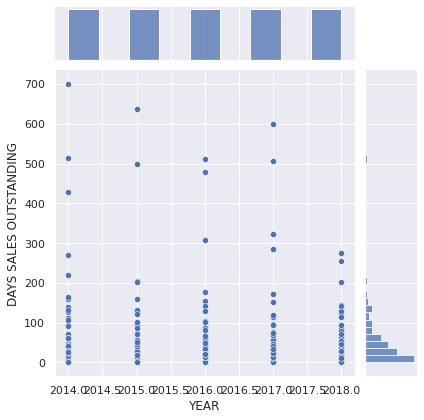

In [19]:
sns.set_theme()

sns.jointplot(x='YEAR', y='DAYS SALES OUTSTANDING', data= df_new,)

In [ ]:
df_new.describe()

,YEAR,MARKET CAPITALIZATION,DAYS SALES OUTSTANDING,DAYS INVENTORY OUTSTANDING,DAYS PAYABLES OUTSTANDING,CASH CONVERSION CYCLE,NET WORKING CAPITAL,NET WORKING CAPITAL TO SALES,LEVERAGE,SALES GROWTH,CURRENT RATIO,QUICK RATIO,TOTAL ASSET,RETURN ON EQUITY
count,250.000000,2.500000e+02,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000
mean,2016.000000,1.461221e+05,70.479639,132.255754,120.748904,81.986489,7112.797920,-0.056977,1.656295,0.109373,1.134354,0.540340,1.258486e+05,0.269585
std,1.417051,4.962607e+05,109.000526,219.852063,280.783848,358.912459,15748.123017,3.252233,18.618681,0.744017,0.662057,0.534479,2.671109e+05,1.519213
min,2014.000000,1.989000e+02,0.000000,0.000734,0.000000,-2825.627643,-34886.600000,-48.776119,-263.727273,-0.989118,0.010165,-0.150000,2.622000e+02,-19.857232
25%,2015.000000,2.149550e+03,14.712588,48.801295,27.302369,12.800443,269.225000,0.036571,0.679569,-0.081008,0.690743,0.210000,5.867275e+03,0.125524
50%,2016.000000,1.235320e+04,34.732815,84.700566,52.949275,56.368852,1586.550000,0.135201,1.349761,0.057997,1.048919,0.395000,2.001520e+04,0.259582
75%,2017.000000,6.494348e+04,72.600898,137.849787,116.978642,136.747466,8832.775000,0.297189,2.692291,0.189612,1.396018,0.667500,1.203615e+05,0.475758
max,2018.000000,3.919317e+06,700.029326,2024.716981,3252.396514,2625.200852,77995.300000,6.387097,89.020942,10.847302,3.279511,4.250000,1.694463e+06,7.685897


In [ ]:
df_new.corr()

,YEAR,MARKET CAPITALIZATION,DAYS SALES OUTSTANDING,DAYS INVENTORY OUTSTANDING,DAYS PAYABLES OUTSTANDING,CASH CONVERSION CYCLE,NET WORKING CAPITAL,NET WORKING CAPITAL TO SALES,LEVERAGE,SALES GROWTH,CURRENT RATIO,QUICK RATIO,TOTAL ASSET,RETURN ON EQUITY
YEAR,1.000000,0.001097,-0.090986,0.053260,0.011787,-0.004229,0.093854,-0.093976,0.106225,0.002645,0.036745,0.029164,0.070019,-0.083512
MARKET CAPITALIZATION,0.001097,1.000000,-0.130716,-0.054128,-0.026424,-0.052182,0.135265,0.010080,-0.002744,0.017230,-0.126550,-0.090511,0.729242,0.047273
DAYS SALES OUTSTANDING,-0.090986,-0.130716,1.000000,0.192092,0.240081,0.233543,-0.008520,0.034238,0.012953,-0.123222,-0.155198,0.010306,-0.115016,-0.015670
DAYS INVENTORY OUTSTANDING,0.053260,-0.054128,0.192092,1.000000,0.038460,0.640800,0.028870,-0.418579,0.013104,-0.080357,0.040662,-0.063059,-0.083582,-0.000869
DAYS PAYABLES OUTSTANDING,0.011787,-0.026424,0.240081,0.038460,1.000000,-0.685848,-0.138108,-0.192474,-0.026562,-0.058322,-0.257712,-0.121663,-0.010783,-0.018082
CASH CONVERSION CYCLE,-0.004229,-0.052182,0.233543,0.640800,-0.685848,1.000000,0.123141,-0.095427,0.032741,-0.041018,0.179387,0.059682,-0.077692,0.008855
NET WORKING CAPITAL,0.093854,0.135265,-0.008520,0.028870,-0.138108,0.123141,1.000000,0.069710,0.016519,0.007162,0.103028,0.005912,0.262743,0.048298
NET WORKING CAPITAL TO SALES,-0.093976,0.010080,0.034238,-0.418579,-0.192474,-0.095427,0.069710,1.000000,-0.003065,-0.001841,0.163873,0.092153,0.020272,0.015544
LEVERAGE,0.106225,-0.002744,0.012953,0.013104,-0.026562,0.032741,0.016519,-0.003065,1.000000,-0.017244,0.048891,0.023134,0.032407,-0.079644
SALES GROWTH,0.002645,0.017230,-0.123222,-0.080357,-0.058322,-0.041018,0.007162,-0.001841,-0.017244,1.000000,0.040707,0.010561,0.067350,-0.040130


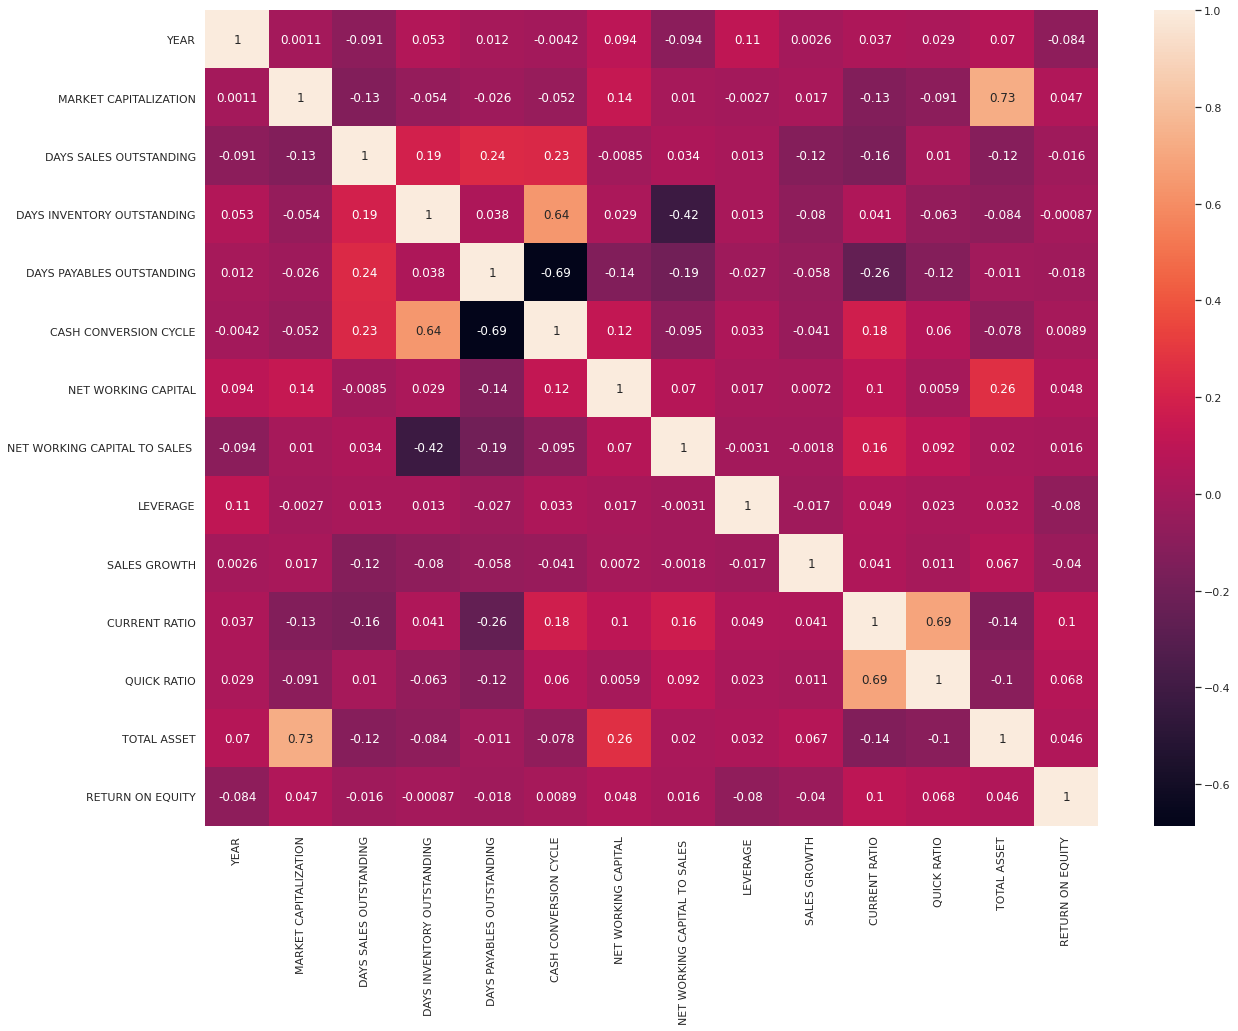

In [87]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True,annot_kws={"size": 12})

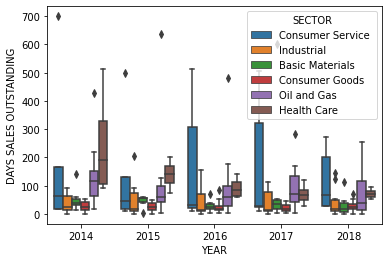

In [ ]:
sns.boxplot(x='YEAR', y='DAYS SALES OUTSTANDING', data= df, hue='SECTOR')

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


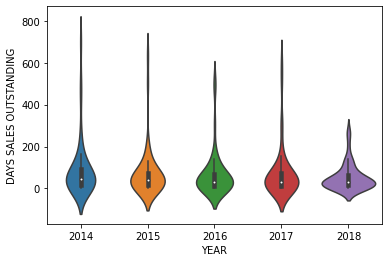

In [ ]:
sns.violinplot(x='YEAR', y='DAYS SALES OUTSTANDING', data=df)

ValueError: ignored

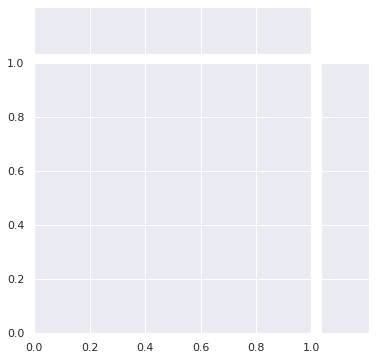

In [84]:
sns.jointplot(x='RETURN ON EQUITY', y='NET WORKING CAPITAL TO SALES', data=df, kind='reg')

In [ ]:
sns.lmplot(x='YEAR', y='NET WORKING CAPITAL TO SALES', data= df_new)

KeyError: ignored

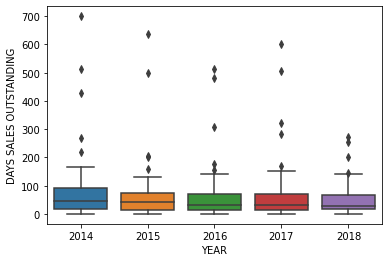

In [ ]:
sns.boxplot(x='YEAR', y='DAYS SALES OUTSTANDING', data= df)

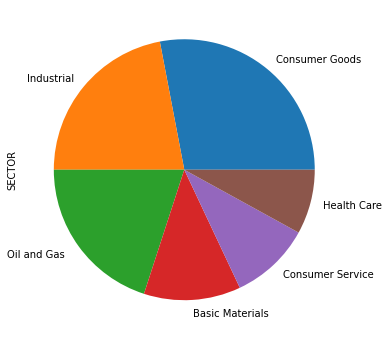

In [ ]:
df['SECTOR'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'NET WORKING CAPITAL TO SALES')

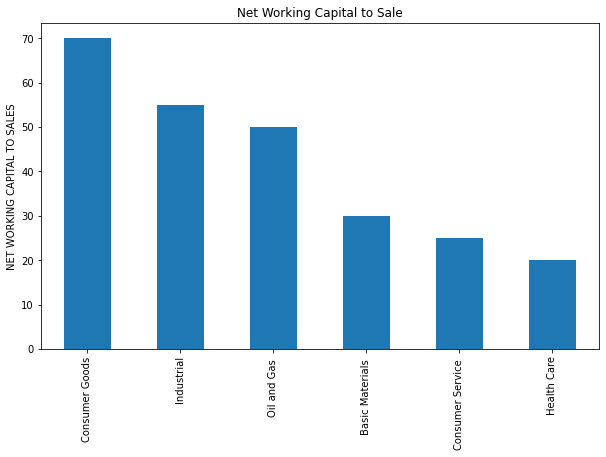

In [ ]:
a =df['SECTOR'].value_counts().plot(kind='bar', figsize =(10,6), title= 'Net Working Capital to Sale')
a.set_ylabel('NET WORKING CAPITAL TO SALES')

Text(0, 0.5, 'NET WORKING CAPITAL TO SALES')

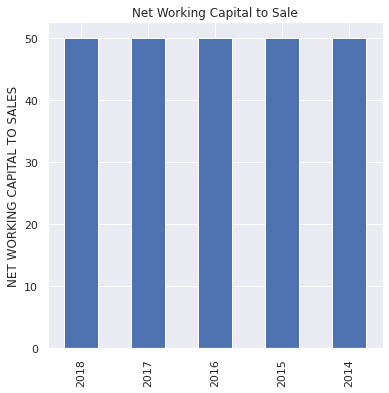

In [27]:
a =df['YEAR'].value_counts().plot(kind='bar', figsize =(6,6), title= 'Net Working Capital to Sale')
a.set_ylabel('NET WORKING CAPITAL TO SALES')

In [31]:
# creating the DataFrame for the components of working capital

df_new= df[['SECTOR', 'DAYS SALES OUTSTANDING','DAYS INVENTORY OUTSTANDING', 'DAYS PAYABLES OUTSTANDING']].copy()
df_new

,SECTOR,DAYS SALES OUTSTANDING,DAYS INVENTORY OUTSTANDING,DAYS PAYABLES OUTSTANDING
0,Consumer Service,15.831122,61.933362,37.243375
1,Consumer Service,10.852164,84.602134,33.030811
2,Consumer Service,11.069672,36.701797,37.232841
3,Consumer Service,11.498302,38.480732,79.491452
4,Consumer Service,27.504008,53.689773,136.964793
...,...,...,...,...
245,Consumer Goods,24.944983,153.903189,82.128145
246,Consumer Goods,50.947962,138.745342,82.996894
247,Consumer Goods,48.625782,180.942973,24.826392
248,Consumer Goods,34.646102,148.631961,99.661272


In [32]:
# reshaping the DataFrame

df_new1=pd.melt(df_new, id_vars='SECTOR', var_name ='Working Capital Components', value_name='DAYS')
df_new1.head()


,SECTOR,Working Capital Components,DAYS
0,Consumer Service,DAYS SALES OUTSTANDING,15.831122
1,Consumer Service,DAYS SALES OUTSTANDING,10.852164
2,Consumer Service,DAYS SALES OUTSTANDING,11.069672
3,Consumer Service,DAYS SALES OUTSTANDING,11.498302
4,Consumer Service,DAYS SALES OUTSTANDING,27.504008


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


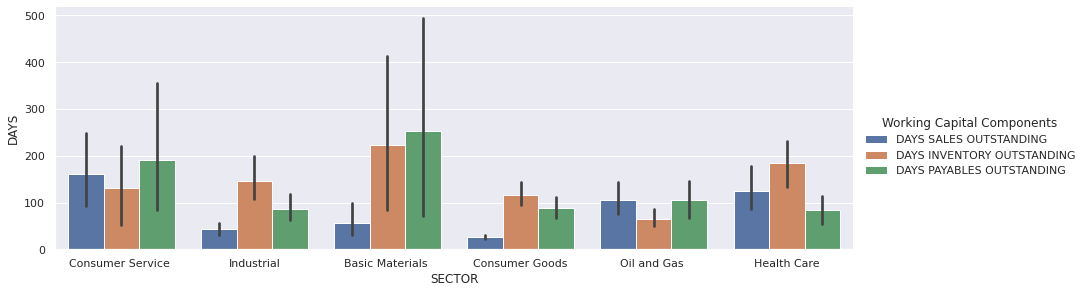

In [33]:
#visualise the components of working capital in mulitple bars

sns.catplot('SECTOR', 'DAYS', hue='Working Capital Components', data=df_new1, kind='bar', size=4, aspect=3)
#sns.plt.title('Improving Working Capital days during 2014-2018, by industry').set_fontsize('14')

In [34]:
# creating the DataFrame for Net Working Capital

df_new2= df[['YEAR','SECTOR', 'NET WORKING CAPITAL']].copy()
df_new2

,YEAR,SECTOR,NET WORKING CAPITAL
0,2014,Consumer Service,715.6
1,2015,Consumer Service,931.7
2,2016,Consumer Service,195.5
3,2017,Consumer Service,-399.3
4,2018,Consumer Service,-735.0
...,...,...,...
245,2014,Consumer Goods,3367.6
246,2015,Consumer Goods,4147.5
247,2016,Consumer Goods,5617.9
248,2017,Consumer Goods,3371.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


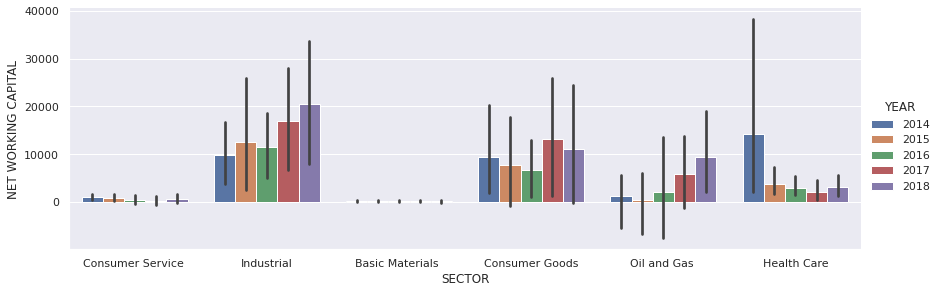

In [35]:
sns.catplot('SECTOR', 'NET WORKING CAPITAL', hue='YEAR', data=df_new2, kind='bar', size=4, aspect=3)

In [69]:
df_new4= df[['YEAR','SECTOR', 'CURRENT RATIO',]].copy()
df_new4

,YEAR,SECTOR,CURRENT RATIO
0,2014,Consumer Service,0.560827
1,2015,Consumer Service,0.634775
2,2016,Consumer Service,0.577794
3,2017,Consumer Service,0.075486
4,2018,Consumer Service,0.777112
...,...,...,...
245,2014,Consumer Goods,1.015902
246,2015,Consumer Goods,1.045714
247,2016,Consumer Goods,0.918073
248,2017,Consumer Goods,0.908009


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


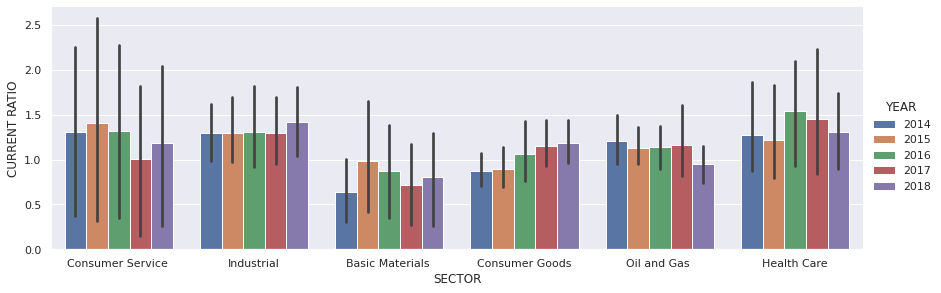

In [77]:
sns.catplot('SECTOR', 'CURRENT RATIO', hue='YEAR', data=df_new4, kind='bar', size=4, aspect=3)

In [72]:
df_new5 = df[['YEAR', 'SECTOR','QUICK RATIO']].copy()
df_new5

,YEAR,SECTOR,QUICK RATIO
0,2014,Consumer Service,0.12
1,2015,Consumer Service,0.10
2,2016,Consumer Service,0.11
3,2017,Consumer Service,0.21
4,2018,Consumer Service,0.25
...,...,...,...
245,2014,Consumer Goods,0.24
246,2015,Consumer Goods,0.37
247,2016,Consumer Goods,0.29
248,2017,Consumer Goods,0.26


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


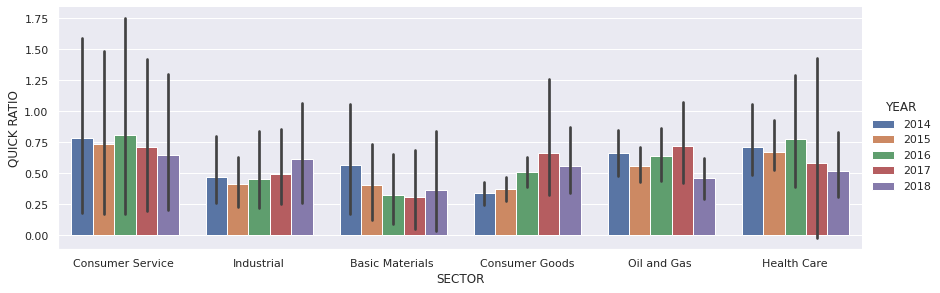

In [78]:
sns.catplot('SECTOR', 'QUICK RATIO', hue='YEAR', data=df_new5, kind='bar', size=4, aspect=3)

In [74]:
df_new6 =df[['YEAR','SECTOR','RETURN ON EQUITY']].copy()
df_new6

,YEAR,SECTOR,RETURN ON EQUITY
0,2014,Consumer Service,0.687427
1,2015,Consumer Service,0.854440
2,2016,Consumer Service,0.742795
3,2017,Consumer Service,0.922178
4,2018,Consumer Service,0.681262
...,...,...,...
245,2014,Consumer Goods,0.601532
246,2015,Consumer Goods,0.500936
247,2016,Consumer Goods,0.360408
248,2017,Consumer Goods,0.476198


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


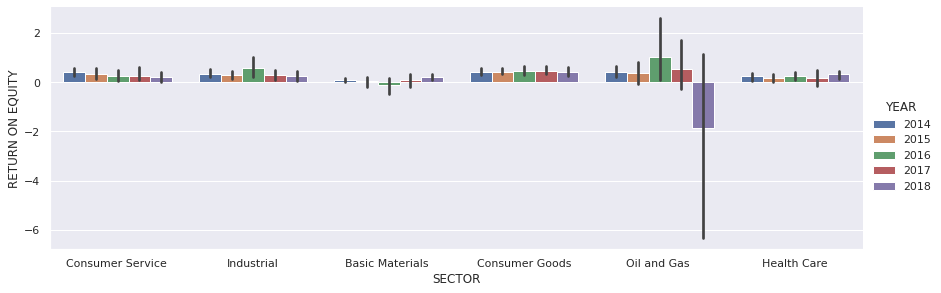

In [80]:
sns.catplot('SECTOR', 'RETURN ON EQUITY', hue='YEAR', data=df_new6, kind='bar', size=4, aspect=3)

In [128]:
df_new7= df[['RETURN ON EQUITY','MARKET CAPITALIZATION', 'DAYS SALES OUTSTANDING','DAYS INVENTORY OUTSTANDING', 'DAYS PAYABLES OUTSTANDING','CASH CONVERSION CYCLE']].copy()
df_new7

,RETURN ON EQUITY,MARKET CAPITALIZATION,DAYS SALES OUTSTANDING,DAYS INVENTORY OUTSTANDING,DAYS PAYABLES OUTSTANDING,CASH CONVERSION CYCLE
0,0.687427,911.7,15.831122,61.933362,37.243375,40.521109
1,0.854440,828.9,10.852164,84.602134,33.030811,62.423488
2,0.742795,828.9,11.069672,36.701797,37.232841,10.538628
3,0.922178,828.9,11.498302,38.480732,79.491452,-29.512418
4,0.681262,480.7,27.504008,53.689773,136.964793,-55.771012
...,...,...,...,...,...,...
245,0.601532,3513.5,24.944983,153.903189,82.128145,96.720027
246,0.500936,5798.5,50.947962,138.745342,82.996894,106.696409
247,0.360408,2990.7,48.625782,180.942973,24.826392,204.742363
248,0.476198,2615.6,34.646102,148.631961,99.661272,83.616791


In [129]:
df_new7.corr()

,RETURN ON EQUITY,MARKET CAPITALIZATION,DAYS SALES OUTSTANDING,DAYS INVENTORY OUTSTANDING,DAYS PAYABLES OUTSTANDING,CASH CONVERSION CYCLE
RETURN ON EQUITY,1.000000,0.047273,-0.015670,-0.000869,-0.018082,0.008855
MARKET CAPITALIZATION,0.047273,1.000000,-0.130716,-0.054128,-0.026424,-0.052182
DAYS SALES OUTSTANDING,-0.015670,-0.130716,1.000000,0.192092,0.240081,0.233543
DAYS INVENTORY OUTSTANDING,-0.000869,-0.054128,0.192092,1.000000,0.038460,0.640800
DAYS PAYABLES OUTSTANDING,-0.018082,-0.026424,0.240081,0.038460,1.000000,-0.685848
CASH CONVERSION CYCLE,0.008855,-0.052182,0.233543,0.640800,-0.685848,1.000000


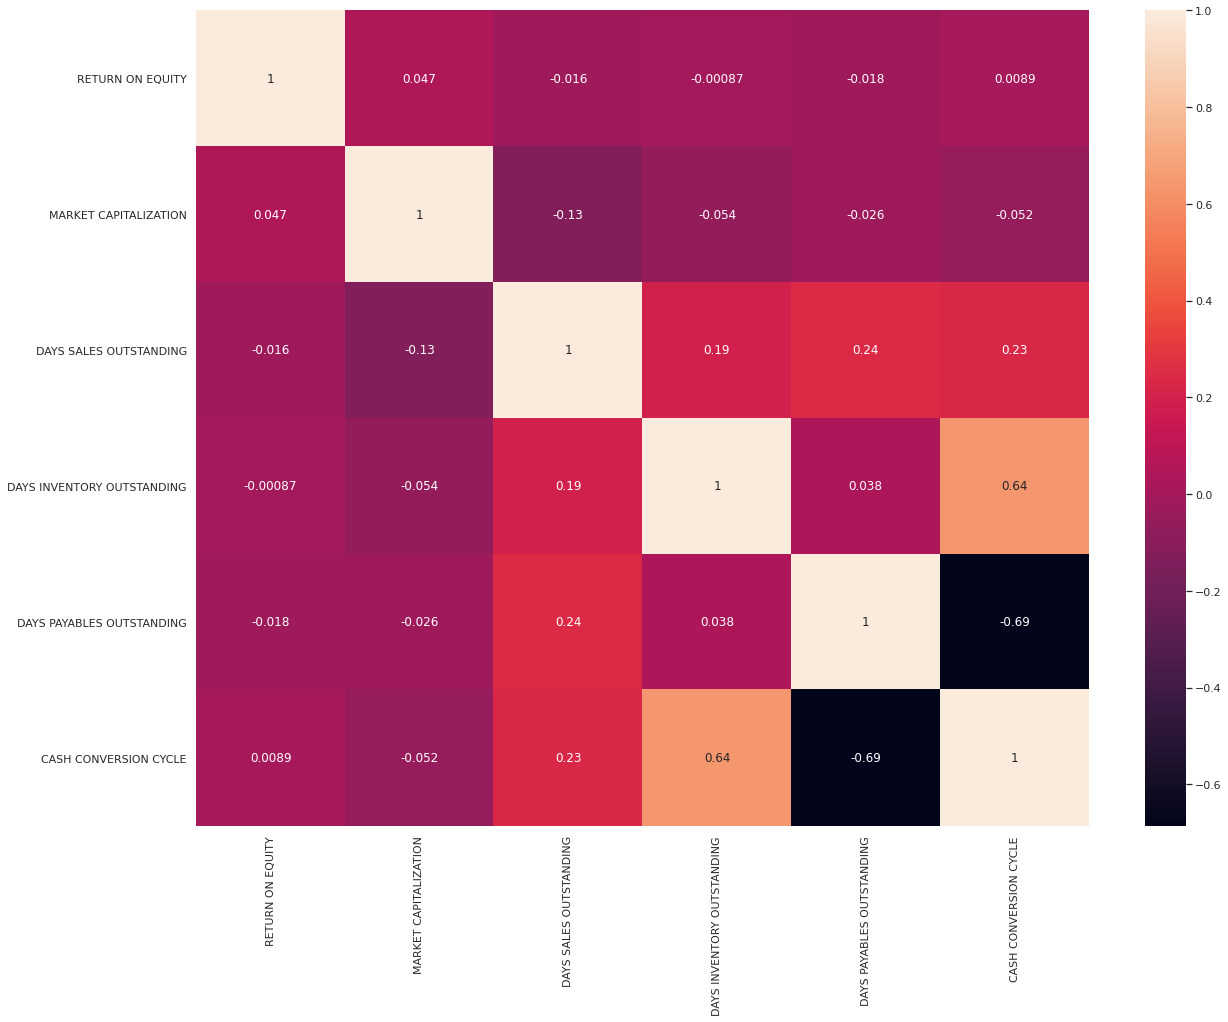

In [183]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_new7.corr(), annot=True,annot_kws={"size": 12})

In [130]:

df.shape

(250, 16)

In [157]:
x= df_new7.iloc[:, :1].values
y= df_new7.iloc[:, 1].values
x_train=np.arange(0,len(x_train),1)

In [158]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [159]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [160]:
def format_change(string):
  return float (string.replace('%', ''))*100 if float(string.replace('%',''))>0 else float(string.replace('%',''))

In [161]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
y_pred=model.predict(x_test)

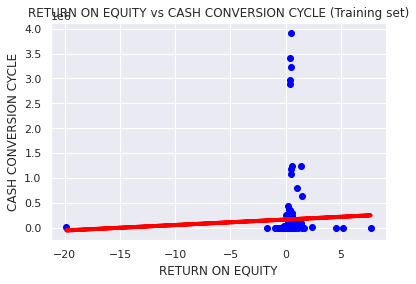

In [173]:
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, model.predict(x_train), color = 'red',linewidth=4)
plt.title('RETURN ON EQUITY vs CASH CONVERSION CYCLE (Training set)')
plt.xlabel('RETURN ON EQUITY')
plt.ylabel("CASH CONVERSION CYCLE")
plt.show()

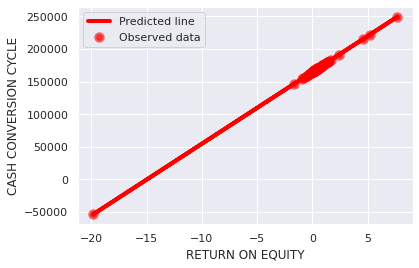

In [178]:
fig = plt.figure()
plt.scatter(x_train, model.predict(x_train), color = 'red',linewidth=4, s=40, alpha=0.6, cmap='viridis')
plt.plot(x_train, model.predict(x_train), color = 'red',linewidth=4)
plt.legend(['Predicted line', 'Observed data'], frameon=True, loc='upper left')
plt.xlabel('RETURN ON EQUITY')
plt.ylabel("CASH CONVERSION CYCLE")
plt.show()

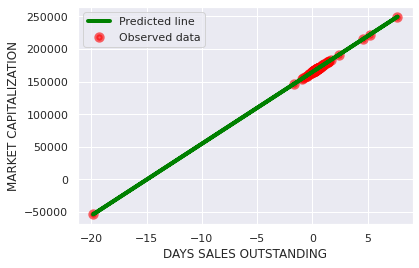

In [182]:
fig = plt.figure()
plt.scatter(x_train, model.predict(x_train), color = 'red',linewidth=4, s=40, alpha=0.6, cmap='viridis')
plt.plot(x_train, model.predict(x_train), color = 'green',linewidth=4)
plt.legend(['Predicted line', 'Observed data'], frameon=True, loc='upper left')
plt.xlabel('DAYS SALES OUTSTANDING')
plt.ylabel('MARKET CAPITALIZATION')
plt.show()

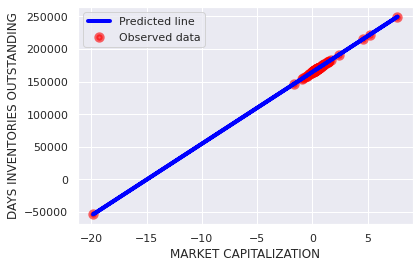

In [181]:
fig = plt.figure()
plt.scatter(x_train, model.predict(x_train), color = 'red',linewidth=4, s=40, alpha=0.6, cmap='viridis')
plt.plot(x_train, model.predict(x_train), color = 'blue',linewidth=4)
plt.legend(['Predicted line', 'Observed data'], frameon=True, loc='upper left')
plt.xlabel('MARKET CAPITALIZATION')
plt.ylabel('DAYS INVENTORIES OUTSTANDING')
plt.show()

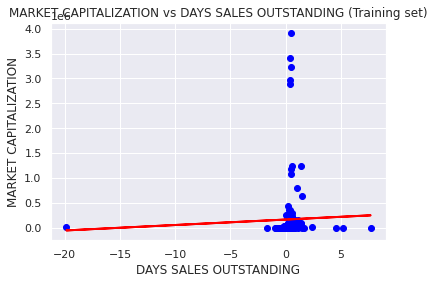

In [169]:
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, model.predict(x_train), color = 'red',linewidth=2)
plt.title('MARKET CAPITALIZATION vs DAYS SALES OUTSTANDING (Training set)')
plt.xlabel('DAYS SALES OUTSTANDING')
plt.ylabel('MARKET CAPITALIZATION')
plt.show()